In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving merged_2010-2019_data.xlsx to merged_2010-2019_data.xlsx
Saving merged_2020-2025_data.xlsx to merged_2020-2025_data.xlsx


In [ ]:
sample_df_all = pd.read_excel('merged_2010-2019_data.xlsx', sheet_name=None)
other_df_all = pd.read_excel('merged_2020-2025_data.xlsx', sheet_name=None)


#**未平倉契約淨額**

**檢視單一法人的OI**

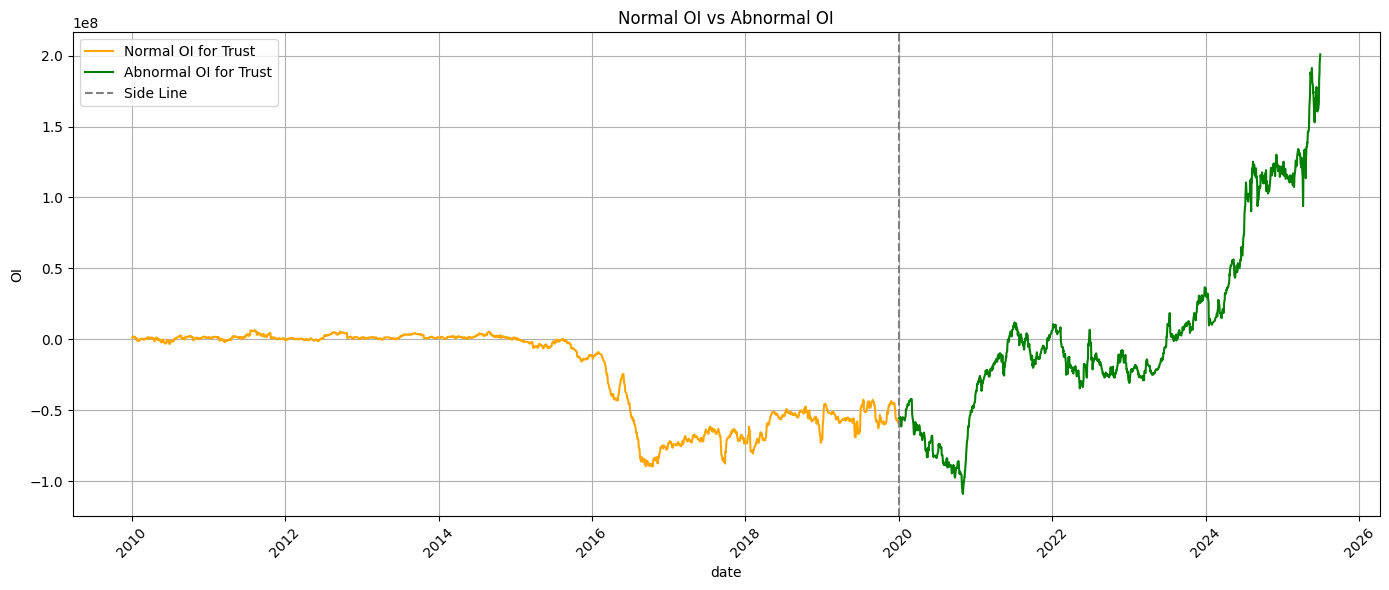

In [ ]:
import matplotlib.pyplot as plt

type_of_legal = '投信'

def eng_type(type_of_legal): #這function超無聊
  if type_of_legal == '自營商':
    return 'Dealer'

  elif type_of_legal == '投信':
    return 'Trust'

  elif type_of_legal == '外資':
    return 'Investor'

sample_df = sample_df_all[type_of_legal]
other_df = other_df_all[type_of_legal]

sample_df['date'] = pd.to_datetime(sample_df['年月日'])
sample_df['OI'] = pd.to_numeric(sample_df['多空未平倉契約淨額'], errors='coerce')
other_df['date'] = pd.to_datetime(other_df['年月日'])
other_df['OI'] = pd.to_numeric(other_df['多空未平倉契約淨額'], errors='coerce')


plt.figure(figsize=(14, 6))
plt.plot(sample_df['date'], sample_df['OI'], label='Normal OI for '+eng_type(type_of_legal), color='orange')
plt.plot(other_df['date'], other_df['OI'], label='Abnormal OI for '+eng_type(type_of_legal), color='green')
plt.axvline(pd.Timestamp('2020-01-01'), color='gray', linestyle='--', label='Side Line')

plt.title('Normal OI vs Abnormal OI')
plt.xlabel('date')
plt.ylabel('OI')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**檢視綜合法人的OI**

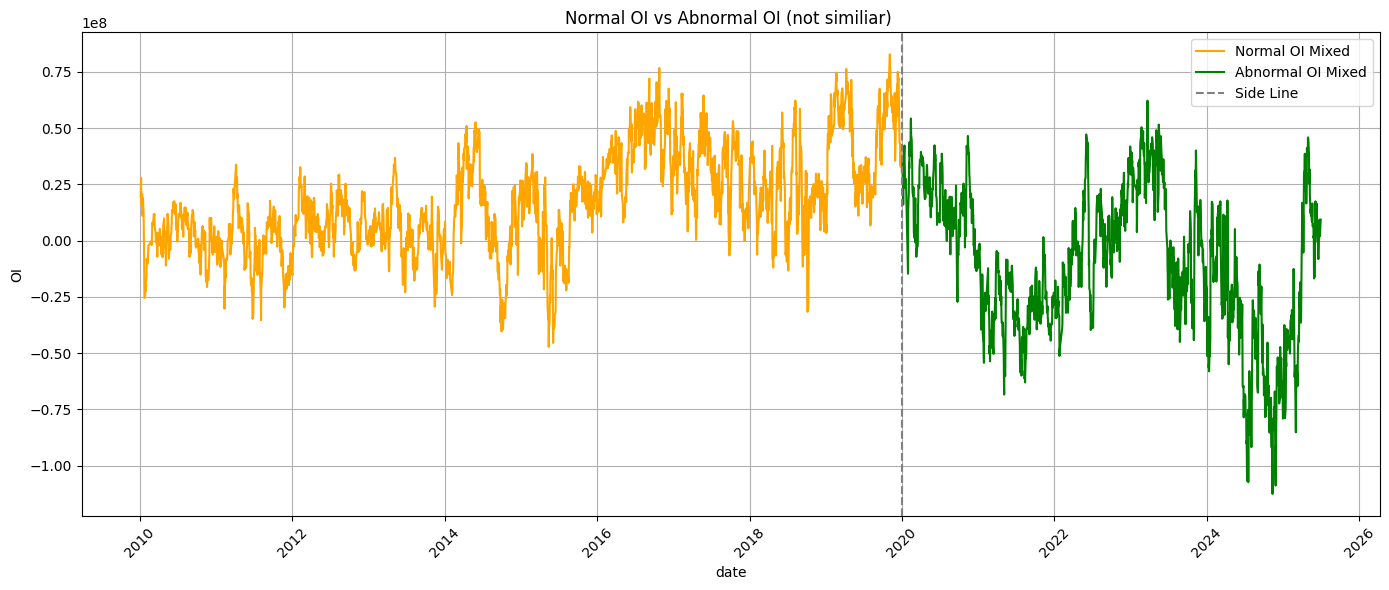

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 把三大法人合併成一份 DataFrame
sample_df = pd.concat(sample_df_all.values(), ignore_index=True)
other_df = pd.concat(other_df_all.values(), ignore_index=True)

# 處理欄位
sample_df['date'] = pd.to_datetime(sample_df['年月日'])
sample_df['OI'] = pd.to_numeric(sample_df['多空未平倉契約淨額'], errors='coerce')
other_df['date'] = pd.to_datetime(other_df['年月日'])
other_df['OI'] = pd.to_numeric(other_df['多空未平倉契約淨額'], errors='coerce')

# 每天加總三大法人的 OI
sample_daily = sample_df.groupby('date')['OI'].sum().reset_index()
other_daily = other_df.groupby('date')['OI'].sum().reset_index()

# 畫圖
plt.figure(figsize=(14, 6))
plt.plot(sample_daily['date'], sample_daily['OI'], label='Normal OI Mixed', color='orange')
plt.plot(other_daily['date'], other_daily['OI'], label='Abnormal OI Mixed', color='green')

plt.axvline(pd.Timestamp('2020-01-01'), color='gray', linestyle='--', label='Side Line')

plt.title('Normal OI vs Abnormal OI (not similiar) ')
plt.xlabel('date')
plt.ylabel('OI')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# **未平倉口數淨額**

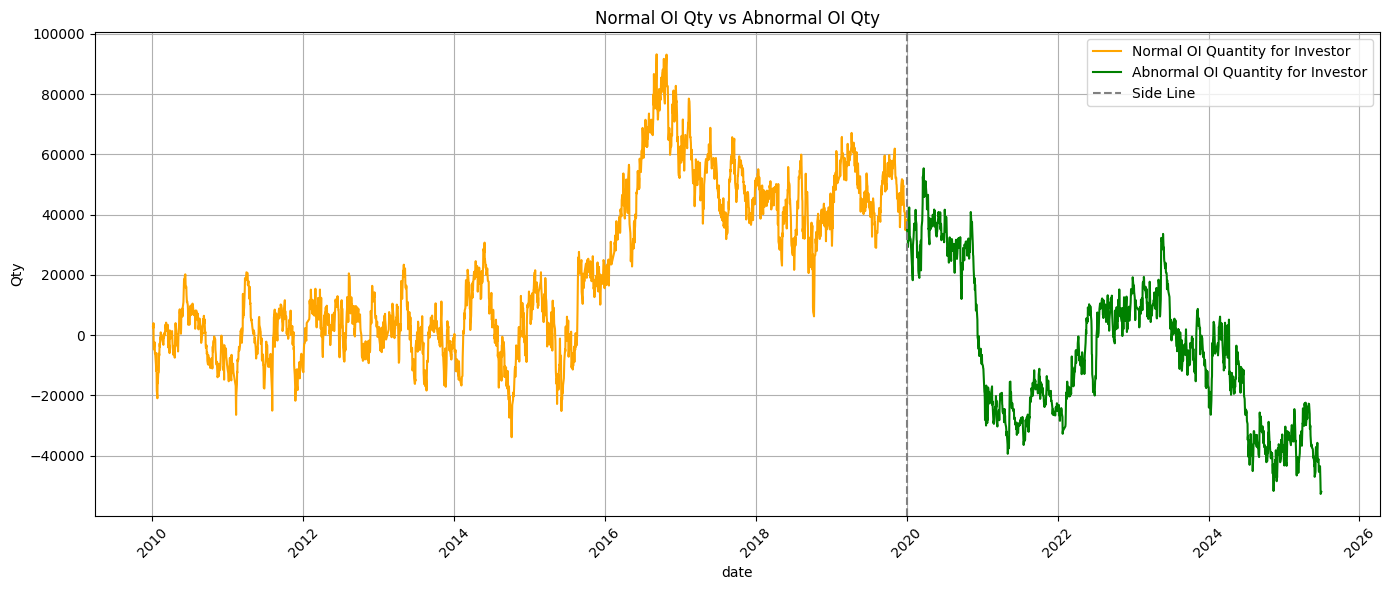

In [ ]:
import matplotlib.pyplot as plt

type_of_legal = '外資'

def eng_type(type_of_legal): #這function超無聊
  if type_of_legal == '自營商':
    return 'Dealer'

  elif type_of_legal == '投信':
    return 'Trust'

  elif type_of_legal == '外資':
    return 'Investor'

sample_df = sample_df_all[type_of_legal]
other_df = other_df_all[type_of_legal]

sample_df['date'] = pd.to_datetime(sample_df['年月日'])
sample_df['OI Qty'] = pd.to_numeric(sample_df['多空未平倉口數淨額'], errors='coerce')
other_df['date'] = pd.to_datetime(other_df['年月日'])
other_df['OI Qty'] = pd.to_numeric(other_df['多空未平倉口數淨額'], errors='coerce')


plt.figure(figsize=(14, 6))
plt.plot(sample_df['date'], sample_df['OI Qty'], label='Normal OI Quantity for '+eng_type(type_of_legal), color='orange')
plt.plot(other_df['date'], other_df['OI Qty'], label='Abnormal OI Quantity for '+eng_type(type_of_legal), color='green')
plt.axvline(pd.Timestamp('2020-01-01'), color='gray', linestyle='--', label='Side Line')

plt.title('Normal OI Qty vs Abnormal OI Qty')
plt.xlabel('date')
plt.ylabel('Qty')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

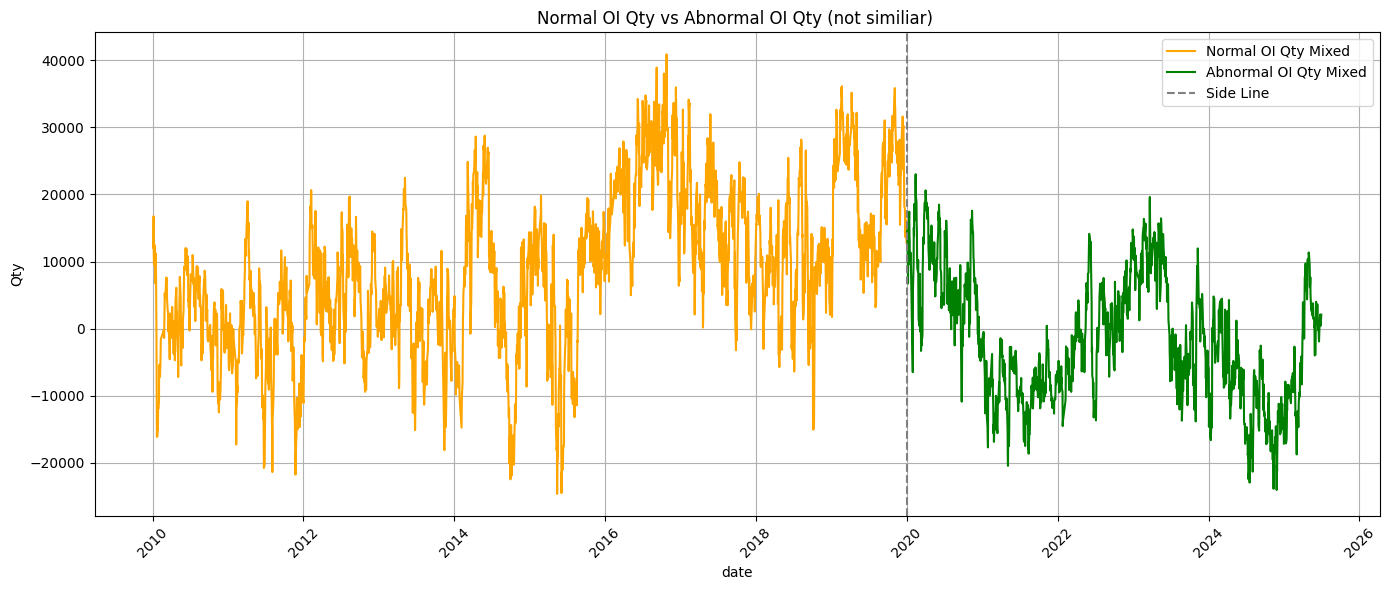

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 把三大法人合併成一份 DataFrame
sample_df = pd.concat(sample_df_all.values(), ignore_index=True)
other_df = pd.concat(other_df_all.values(), ignore_index=True)

# 處理欄位
sample_df['date'] = pd.to_datetime(sample_df['年月日'])
sample_df['OI Qty'] = pd.to_numeric(sample_df['多空未平倉口數淨額'], errors='coerce')
other_df['date'] = pd.to_datetime(other_df['年月日'])
other_df['OI Qty'] = pd.to_numeric(other_df['多空未平倉口數淨額'], errors='coerce')

# 每天加總三大法人的 OI
sample_daily = sample_df.groupby('date')['OI Qty'].sum().reset_index()
other_daily = other_df.groupby('date')['OI Qty'].sum().reset_index()

# 畫圖
plt.figure(figsize=(14, 6))
plt.plot(sample_daily['date'], sample_daily['OI Qty'], label='Normal OI Qty Mixed', color='orange')
plt.plot(other_daily['date'], other_daily['OI Qty'], label='Abnormal OI Qty Mixed', color='green')

plt.axvline(pd.Timestamp('2020-01-01'), color='gray', linestyle='--', label='Side Line')

plt.title('Normal OI Qty vs Abnormal OI Qty (not similiar) ')
plt.xlabel('date')
plt.ylabel('Qty')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
